In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [320]:
df = pd.read_csv("prosperLoanData.csv")
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## Data Preprocessing

In [321]:
df.shape

(113937, 81)

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### droping columns that have no effects


In [323]:
df.drop(['ListingKey','ListingNumber','BorrowerState','GroupKey','LoanKey','LoanNumber','MemberKey','ListingCreationDate','DateCreditPulled','FirstRecordedCreditLine','LoanOriginationDate','LoanOriginationQuarter'],axis=1,inplace=True)
df.head()


,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [324]:
df.duplicated().sum()

0

### handling null values

In [325]:
pd.set_option('display.max_rows', 500)
df.isnull().sum()* 100 / len(df)

CreditGrade                            74.588588
Term                                    0.000000
LoanStatus                              0.000000
ClosedDate                             51.649596
BorrowerAPR                             0.021942
BorrowerRate                            0.000000
LenderYield                             0.000000
EstimatedEffectiveYield                25.526387
EstimatedLoss                          25.526387
EstimatedReturn                        25.526387
ProsperRating (numeric)                25.526387
ProsperRating (Alpha)                  25.526387
ProsperScore                           25.526387
ListingCategory (numeric)               0.000000
Occupation                              3.149109
EmploymentStatus                        1.979164
EmploymentStatusDuration                6.692295
IsBorrowerHomeowner                     0.000000
CurrentlyInGroup                        0.000000
CreditScoreRangeLower                   0.518708
CreditScoreRangeUppe

In [326]:
# dropping columns with more than 80% null values
df = df.drop(['TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanFirstDefaultedCycleNumber'],axis=1)


In [327]:
for x in df:
    if(df[x].isna().sum()):
        print (x,"/",df[x].dtype)

CreditGrade / object
ClosedDate / object
BorrowerAPR / float64
EstimatedEffectiveYield / float64
EstimatedLoss / float64
EstimatedReturn / float64
ProsperRating (numeric) / float64
ProsperRating (Alpha) / object
ProsperScore / float64
Occupation / object
EmploymentStatus / object
EmploymentStatusDuration / float64
CreditScoreRangeLower / float64
CreditScoreRangeUpper / float64
CurrentCreditLines / float64
OpenCreditLines / float64
TotalCreditLinespast7years / float64
InquiriesLast6Months / float64
TotalInquiries / float64
CurrentDelinquencies / float64
AmountDelinquent / float64
DelinquenciesLast7Years / float64
PublicRecordsLast10Years / float64
PublicRecordsLast12Months / float64
RevolvingCreditBalance / float64
BankcardUtilization / float64
AvailableBankcardCredit / float64
TotalTrades / float64
TradesNeverDelinquent (percentage) / float64
TradesOpenedLast6Months / float64
DebtToIncomeRatio / float64


In [328]:
df['CreditGrade'].value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

Text(0.5, 0, 'CreditGrade')

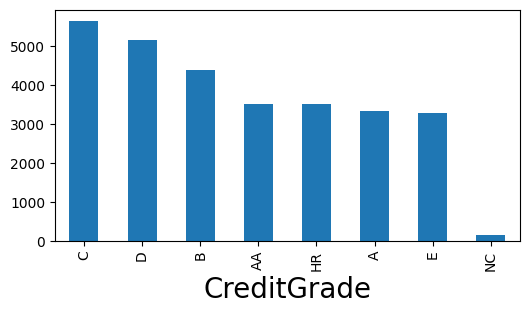

In [329]:
# What are the most number of borrowers Credit Grade?
# c
plt.figure(figsize=(6,3))
df['CreditGrade'].value_counts().plot.bar()
plt.xlabel('CreditGrade', fontsize=20) 

In [330]:
df['CreditGrade'].fillna(df['CreditGrade'].mode().iloc[0],inplace=True)
df['CreditGrade'].value_counts()

C     90633
D      5153
B      4389
AA     3509
HR     3508
A      3315
E      3289
NC      141
Name: CreditGrade, dtype: int64

In [331]:
df['CreditGrade'].isna().sum()

0

In [332]:
print(df['BorrowerAPR'].value_counts())
print(df['BorrowerAPR'].isna().sum())

0.35797    3672
0.35643    1644
0.37453    1260
0.30532     902
0.29510     747
           ... 
0.37266       1
0.27518       1
0.18477       1
0.29961       1
0.19543       1
Name: BorrowerAPR, Length: 6677, dtype: int64
25


In [333]:
df = df.dropna(axis=0, subset=['BorrowerAPR'])

In [334]:
df['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

Text(0.5, 0, 'EmploymentStatus')

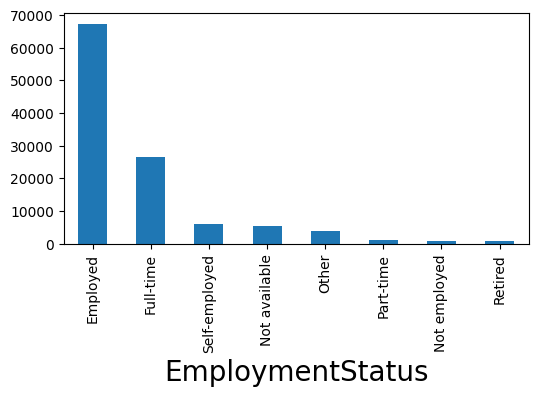

In [335]:
plt.figure(figsize=(6,3))
df['EmploymentStatus'].value_counts().plot.bar()
plt.xlabel('EmploymentStatus', fontsize=20)

In [336]:
print(df['EmploymentStatus'].isna().sum())

2230


In [337]:
df['EmploymentStatus'].fillna('Other',inplace=True)
df['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Other             6036
Not available     5347
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [338]:
df['Occupation'].value_counts()

Other                                 28617
Professional                          13628
Computer Programmer                    4478
Executive                              4311
Teacher                                3759
Administrative Assistant               3688
Analyst                                3602
Sales - Commission                     3446
Accountant/CPA                         3233
Clerical                               3164
Sales - Retail                         2797
Skilled Labor                          2746
Retail Management                      2602
Nurse (RN)                             2489
Construction                           1790
Truck Driver                           1675
Laborer                                1595
Police Officer/Correction Officer      1578
Civil Service                          1457
Engineer - Mechanical                  1406
Military Enlisted                      1272
Food Service Management                1239
Engineer - Electrical           

Text(0.5, 0, 'Occupation')

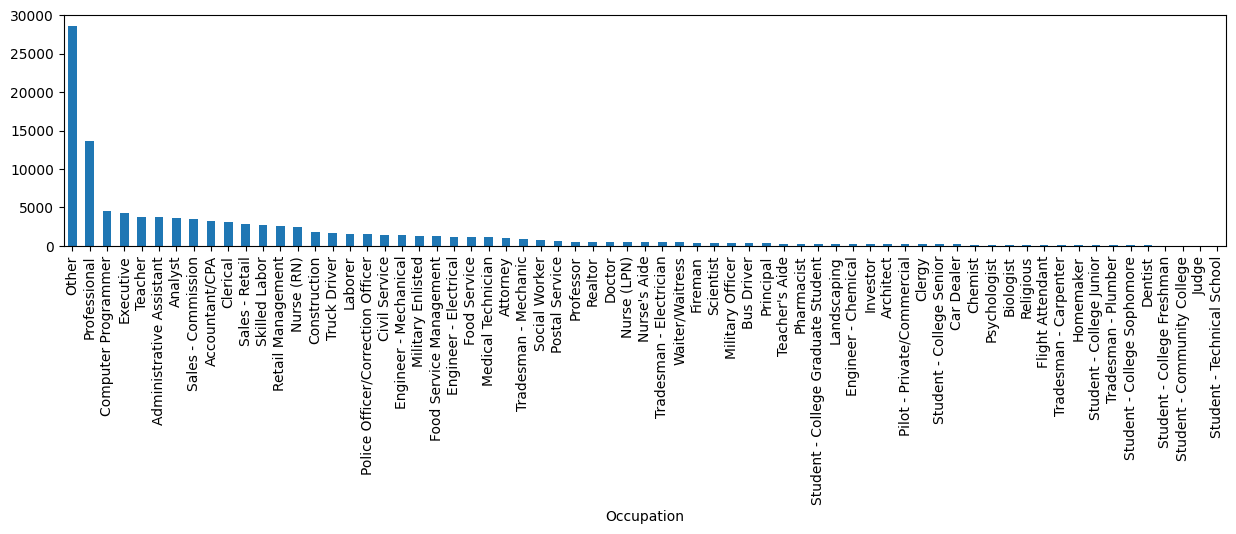

In [339]:
plt.figure(figsize=(15,3))
df['Occupation'].value_counts().plot.bar()
plt.xlabel('Occupation', fontsize=10)

In [340]:
print(df['Occupation'].isna().sum())

3563


In [341]:
df['Occupation'].fillna('Other',inplace=True)

In [342]:
df['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [343]:
df['ProsperRating (Alpha)'].fillna(df['ProsperRating (Alpha)'].mode().iloc[0],inplace=True)
df['ProsperRating (Alpha)'].value_counts()

C     47404
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [344]:
print(df['EmploymentStatusDuration'].value_counts())
print(df['EmploymentStatusDuration'].isna().sum())

0.0      1534
4.0      1186
1.0      1177
3.0      1174
2.0      1153
         ... 
648.0       1
662.0       1
733.0       1
690.0       1
578.0       1
Name: EmploymentStatusDuration, Length: 605, dtype: int64
7600


In [345]:
print(df['CurrentCreditLines'].value_counts())
print(df['CurrentCreditLines'].isna().sum())

8.0     8985
7.0     8945
9.0     8731
10.0    8152
11.0    7500
6.0     7449
12.0    6530
5.0     6367
13.0    5677
14.0    4927
4.0     4804
15.0    3985
3.0     3553
16.0    3468
17.0    2619
2.0     2467
18.0    2242
19.0    1730
20.0    1377
1.0     1351
21.0    1068
22.0     828
23.0     670
24.0     563
25.0     446
0.0      385
26.0     348
27.0     251
28.0     205
29.0     145
30.0     119
31.0      91
32.0      75
33.0      62
35.0      40
34.0      39
36.0      34
38.0      23
37.0      23
39.0      13
40.0      10
41.0       8
44.0       4
52.0       3
47.0       3
45.0       3
54.0       3
48.0       3
42.0       3
56.0       2
43.0       1
59.0       1
51.0       1
46.0       1
Name: CurrentCreditLines, dtype: int64
7579


In [346]:
print(df['OpenCreditLines'].value_counts())
print(df['OpenCreditLines'].isna().sum())

7.0     10033
8.0      9556
6.0      9117
9.0      9018
5.0      8090
10.0     7983
11.0     6874
4.0      6153
12.0     5880
13.0     4897
3.0      4690
14.0     4023
15.0     3201
2.0      3195
16.0     2497
17.0     2006
1.0      1708
18.0     1544
19.0     1131
20.0      918
21.0      741
22.0      605
0.0       562
23.0      435
24.0      372
25.0      276
26.0      158
27.0      140
28.0      130
29.0       94
30.0       66
31.0       59
32.0       41
33.0       33
34.0       24
35.0       22
37.0       11
38.0       11
36.0       11
39.0        4
41.0        4
40.0        4
45.0        3
43.0        2
42.0        2
44.0        2
48.0        2
46.0        1
47.0        1
54.0        1
51.0        1
49.0        1
Name: OpenCreditLines, dtype: int64
7579


In [347]:
print(df['TotalCreditLinespast7years'].value_counts())
print(df['TotalCreditLinespast7years'].isna().sum())


21.0     3552
22.0     3507
20.0     3480
19.0     3451
25.0     3447
23.0     3421
18.0     3392
27.0     3390
24.0     3390
26.0     3388
28.0     3292
17.0     3258
16.0     3118
29.0     3043
15.0     3041
30.0     2977
14.0     2851
31.0     2767
13.0     2676
32.0     2671
33.0     2596
34.0     2540
12.0     2397
11.0     2305
35.0     2245
36.0     2209
10.0     2036
37.0     1973
38.0     1869
9.0      1774
39.0     1711
40.0     1538
8.0      1500
41.0     1470
42.0     1424
7.0      1319
43.0     1258
44.0     1162
6.0      1133
45.0     1075
46.0      980
47.0      925
5.0       904
48.0      900
4.0       792
49.0      779
50.0      706
3.0       697
51.0      616
52.0      613
2.0       574
53.0      557
54.0      492
55.0      403
56.0      383
58.0      334
57.0      294
59.0      256
60.0      240
61.0      223
62.0      220
63.0      170
64.0      151
66.0      140
65.0      138
67.0      109
68.0      103
69.0       90
70.0       88
72.0       77
73.0       63
71.0  

In [348]:
print(df['InquiriesLast6Months'].value_counts())
print(df['InquiriesLast6Months'].isna().sum())

0.0      50005
1.0      28621
2.0      14432
3.0       7697
4.0       4297
5.0       2610
6.0       1664
7.0       1014
8.0        696
9.0        508
10.0       372
11.0       275
12.0       207
13.0       163
14.0       128
15.0        98
16.0        79
17.0        64
18.0        53
21.0        40
19.0        33
20.0        30
22.0        22
23.0        18
24.0        16
25.0        14
26.0        14
31.0        10
28.0         8
27.0         8
29.0         6
32.0         4
35.0         4
34.0         4
30.0         4
37.0         3
40.0         3
38.0         2
33.0         2
44.0         2
41.0         1
36.0         1
63.0         1
97.0         1
42.0         1
46.0         1
52.0         1
105.0        1
53.0         1
50.0         1
Name: InquiriesLast6Months, dtype: int64
672


In [349]:
print(df['TotalInquiries'].value_counts())
print(df['TotalInquiries'].isna().sum())

2.0      14887
3.0      13934
1.0      13785
4.0      12148
5.0      10098
0.0       8430
6.0       7607
7.0       6171
8.0       4692
9.0       3779
10.0      2914
11.0      2431
12.0      1786
13.0      1453
14.0      1245
15.0       978
16.0       864
17.0       724
18.0       581
19.0       539
20.0       428
21.0       372
22.0       347
23.0       301
24.0       231
25.0       205
26.0       198
27.0       176
28.0       146
30.0       120
29.0       113
32.0       104
31.0        90
33.0        83
35.0        69
36.0        65
34.0        58
38.0        51
37.0        50
39.0        42
40.0        38
46.0        32
42.0        32
41.0        32
44.0        29
43.0        27
47.0        25
45.0        20
48.0        16
50.0        15
49.0        15
52.0        14
51.0        14
58.0        12
56.0        11
53.0        10
55.0         9
61.0         9
54.0         9
62.0         8
66.0         7
63.0         7
64.0         6
70.0         6
65.0         6
71.0         5
57.0      

In [350]:
print(df['DebtToIncomeRatio'].value_counts())
print(df['DebtToIncomeRatio'].isna().sum())

0.18000    4132
0.22000    3687
0.17000    3616
0.14000    3553
0.20000    3481
           ... 
0.19877       1
0.02168       1
0.06375       1
0.06281       1
0.07419       1
Name: DebtToIncomeRatio, Length: 1182, dtype: int64
8554


In [351]:
print(df['CurrentDelinquencies'].value_counts())
print(df['CurrentDelinquencies'].isna().sum())

0.0     89742
1.0     11716
2.0      4357
3.0      2098
4.0      1379
5.0       916
6.0       690
7.0       517
8.0       397
9.0       289
10.0      212
11.0      191
12.0      147
13.0      111
15.0       83
14.0       71
16.0       58
17.0       40
18.0       37
21.0       31
19.0       28
20.0       27
22.0       21
24.0       12
27.0       12
23.0        9
26.0        8
31.0        6
32.0        5
28.0        5
25.0        5
35.0        2
30.0        2
36.0        2
41.0        2
64.0        1
33.0        1
59.0        1
50.0        1
57.0        1
39.0        1
45.0        1
83.0        1
82.0        1
37.0        1
40.0        1
51.0        1
Name: CurrentDelinquencies, dtype: int64
672


In [352]:
print(df['AmountDelinquent'].value_counts())
print(df['AmountDelinquent'].isna().sum())

0.0        89818
50.0          73
100.0         67
25.0          66
30.0          65
           ...  
14910.0        1
1280.0         1
13180.0        1
2023.0         1
5062.0         1
Name: AmountDelinquent, Length: 7059, dtype: int64
7597


In [353]:
print(df['DelinquenciesLast7Years'].value_counts())
print(df['DelinquenciesLast7Years'].isna().sum())

0.0     76439
1.0      3967
3.0      3183
2.0      2879
4.0      2592
5.0      1826
6.0      1790
7.0      1648
8.0      1421
9.0      1208
10.0     1151
11.0     1075
12.0      982
13.0      873
14.0      821
15.0      795
16.0      731
17.0      608
18.0      574
20.0      565
19.0      540
21.0      472
23.0      439
24.0      423
22.0      421
25.0      347
26.0      330
27.0      317
28.0      296
29.0      287
30.0      248
32.0      225
31.0      214
35.0      201
34.0      190
33.0      190
37.0      153
39.0      148
36.0      147
38.0      144
42.0      128
40.0      113
99.0      110
44.0      110
41.0      106
43.0      101
47.0       94
46.0       90
45.0       81
48.0       78
49.0       74
51.0       72
50.0       72
52.0       55
56.0       53
60.0       41
54.0       40
53.0       40
55.0       39
62.0       36
61.0       34
65.0       34
59.0       34
63.0       31
58.0       31
57.0       30
64.0       28
66.0       27
75.0       22
67.0       22
69.0       20
68.0  

In [354]:
print(df['PublicRecordsLast10Years'].value_counts())
print(df['PublicRecordsLast10Years'].isna().sum())

0.0     85803
1.0     22834
2.0      3011
3.0       894
4.0       345
5.0       151
6.0        70
7.0        46
8.0        31
9.0        15
10.0        8
11.0        7
16.0        5
12.0        4
14.0        4
15.0        3
21.0        1
13.0        1
25.0        1
38.0        1
30.0        1
20.0        1
34.0        1
22.0        1
17.0        1
Name: PublicRecordsLast10Years, dtype: int64
672


In [355]:
print(df['PublicRecordsLast12Months'].value_counts())
print(df['PublicRecordsLast12Months'].isna().sum())

0.0     104941
1.0       1255
2.0         96
3.0         28
4.0         10
7.0          2
20.0         1
Name: PublicRecordsLast12Months, dtype: int64
7579


In [356]:
print(df['RevolvingCreditBalance'].value_counts())
print(df['RevolvingCreditBalance'].isna().sum())

0.0        4059
59.0         36
39.0         32
75.0         27
3.0          26
           ... 
27768.0       1
28949.0       1
16828.0       1
38447.0       1
89961.0       1
Name: RevolvingCreditBalance, Length: 38555, dtype: int64
7579


In [357]:
print(df['TotalTrades'].value_counts())
print(df['TotalTrades'].isna().sum())

17.0     3800
20.0     3775
18.0     3766
19.0     3745
16.0     3728
21.0     3670
23.0     3618
15.0     3614
14.0     3521
22.0     3507
24.0     3433
25.0     3292
13.0     3235
26.0     3225
27.0     3062
12.0     2973
28.0     2880
11.0     2789
29.0     2684
10.0     2610
30.0     2520
31.0     2389
9.0      2255
32.0     2245
8.0      2025
33.0     2024
34.0     1909
35.0     1725
7.0      1698
36.0     1606
37.0     1452
6.0      1448
38.0     1222
39.0     1217
40.0     1159
5.0      1091
41.0      968
4.0       912
42.0      890
43.0      785
3.0       763
44.0      701
2.0       674
46.0      624
45.0      614
47.0      518
48.0      452
49.0      424
50.0      351
51.0      331
52.0      277
1.0       233
53.0      221
54.0      219
55.0      184
56.0      157
57.0      146
58.0      123
59.0      116
60.0       91
61.0       82
62.0       72
64.0       62
63.0       60
65.0       60
66.0       52
68.0       33
67.0       29
72.0       27
69.0       26
70.0       25
71.0  

In [358]:
print(df['TradesOpenedLast6Months'].value_counts())
print(df['TradesOpenedLast6Months'].isna().sum())

0.0     54249
1.0     31475
2.0     13180
3.0      4678
4.0      1646
5.0       652
6.0       273
7.0       116
8.0        54
9.0        24
10.0       13
11.0       12
12.0        8
13.0        5
17.0        2
14.0        2
15.0        2
16.0        1
20.0        1
Name: TradesOpenedLast6Months, dtype: int64
7519


In [359]:
print(df['AvailableBankcardCredit'].value_counts())
print(df['AvailableBankcardCredit'].isna().sum())

0.0        4881
500.0       303
300.0       151
1000.0      145
2000.0      134
           ... 
23067.0       1
70401.0       1
20374.0       1
60444.0       1
34415.0       1
Name: AvailableBankcardCredit, Length: 31829, dtype: int64
7519


In [360]:
cols = ['EmploymentStatusDuration','AvailableBankcardCredit','CurrentCreditLines','OpenCreditLines','TotalCreditLinespast7years','InquiriesLast6Months','TotalInquiries','CurrentDelinquencies','AmountDelinquent','DelinquenciesLast7Years','PublicRecordsLast10Years','PublicRecordsLast12Months','RevolvingCreditBalance','TotalTrades','TradesOpenedLast6Months']
for x in cols:

    df[x].fillna(0,inplace=True)
    df[x] = df[x].astype(int)


In [361]:
df['BankcardUtilization'].fillna(0.00,inplace=True)
df['TradesNeverDelinquent (percentage)'].fillna(0.00,inplace=True)


In [362]:
for x in df:
    if(df[x].isna().sum()):
        print (x,"/",df[x].dtype)

ClosedDate / object
EstimatedEffectiveYield / float64
EstimatedLoss / float64
EstimatedReturn / float64
ProsperRating (numeric) / float64
ProsperScore / float64
CreditScoreRangeLower / float64
CreditScoreRangeUpper / float64
DebtToIncomeRatio / float64


In [363]:
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'])


In [364]:
# Fill null values in numerical columns with the mean
num = df.select_dtypes(include=['float64']).columns
df[num] = df[num].fillna(df[num].mean())


In [365]:
for x in df:
    if(df[x].isna().sum()):
        print (x,"/",df[x].dtype)

ClosedDate / datetime64[ns]


### Handeling outliers

In [366]:
def outliers(df,str):
    arr = df[str].to_numpy()
    arr = np.sort(arr)
    # finding the 1st quartile
    q1 = np.quantile(arr, 0.25)
    
    # finding the 3rd quartile
    q3 = np.quantile(arr, 0.75)
    
    # finding the iqr region
    iqr = q3-q1
    
    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    outliers = arr[(arr <= lower_bound) | (arr >= upper_bound)]
    
    return  lower_bound, upper_bound, outliers.size

In [367]:
def removeOutliers(df,str, upper_bound,lower_bound):
    df[str] = np.where(df[str]>upper_bound,upper_bound,df[str]) 
    df[str] = np.where(df[str]<lower_bound,lower_bound,df[str]) 
    return

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 60 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   CreditGrade                         113912 non-null  object        
 1   Term                                113912 non-null  int64         
 2   LoanStatus                          113912 non-null  object        
 3   ClosedDate                          55064 non-null   datetime64[ns]
 4   BorrowerAPR                         113912 non-null  float64       
 5   BorrowerRate                        113912 non-null  float64       
 6   LenderYield                         113912 non-null  float64       
 7   EstimatedEffectiveYield             113912 non-null  float64       
 8   EstimatedLoss                       113912 non-null  float64       
 9   EstimatedReturn                     113912 non-null  float64       
 10  ProsperR

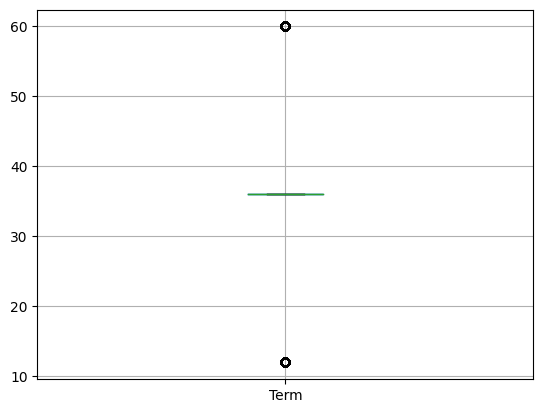

The number of the outliers for Term in the boxplot: 113912


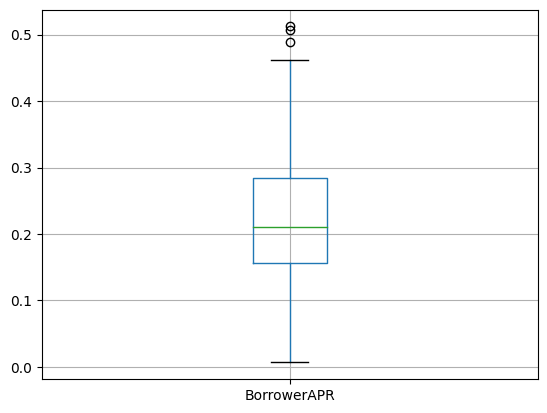

The number of the outliers for BorrowerAPR in the boxplot: 3


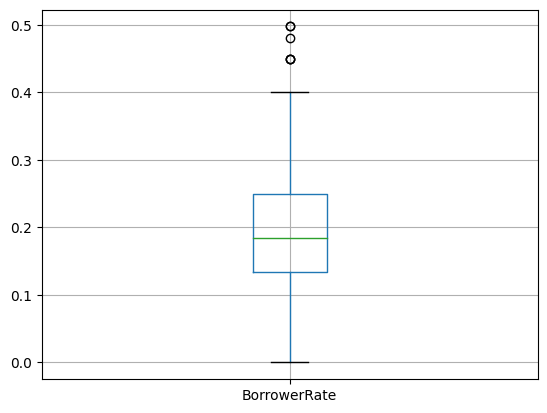

The number of the outliers for BorrowerRate in the boxplot: 6


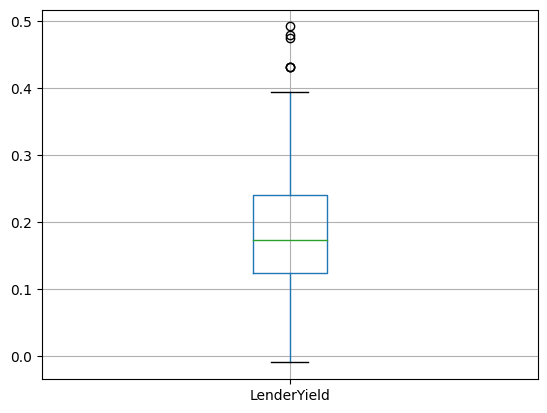

The number of the outliers for LenderYield in the boxplot: 6


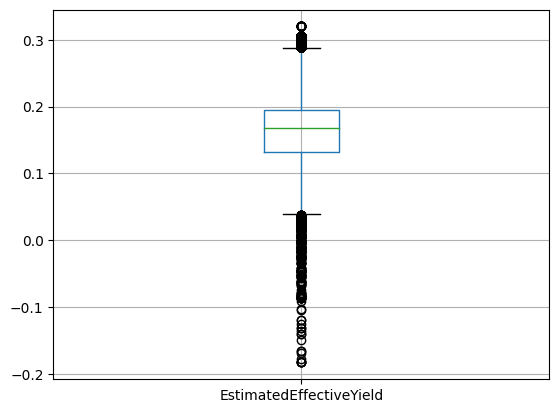

The number of the outliers for EstimatedEffectiveYield in the boxplot: 5920


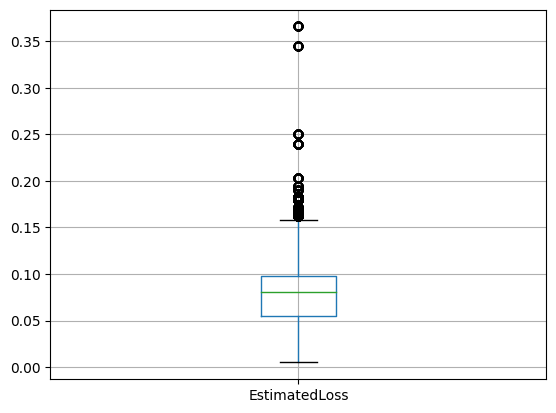

The number of the outliers for EstimatedLoss in the boxplot: 6306


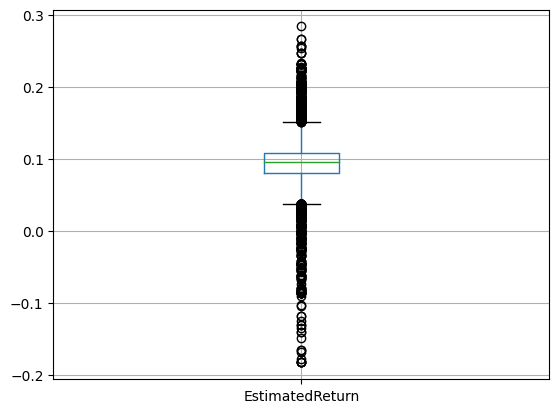

The number of the outliers for EstimatedReturn in the boxplot: 3263


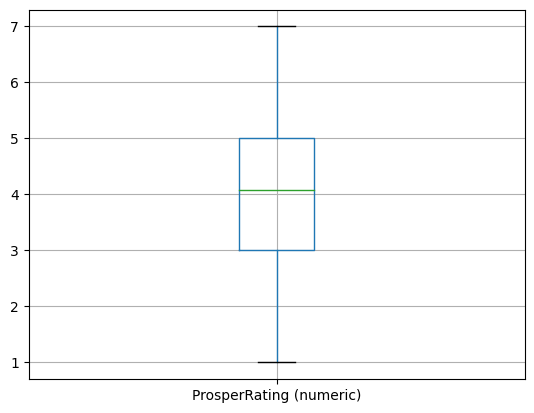

The number of the outliers for ProsperRating (numeric) in the boxplot: 0


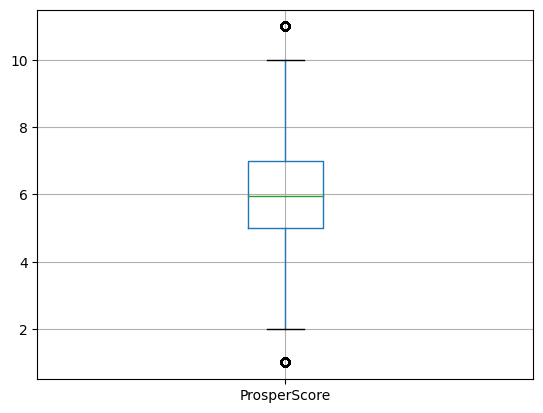

The number of the outliers for ProsperScore in the boxplot: 12964


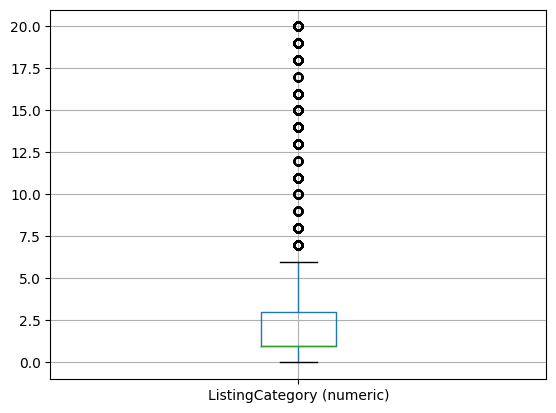

The number of the outliers for ListingCategory (numeric) in the boxplot: 20891


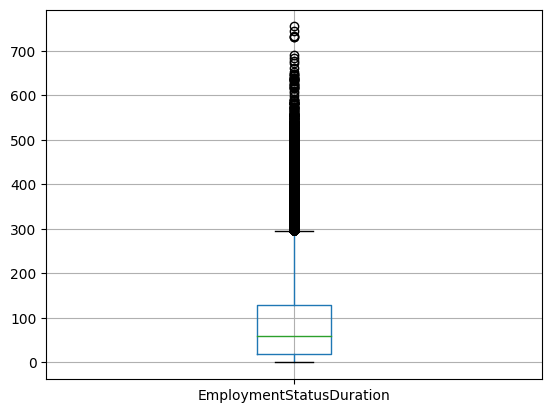

The number of the outliers for EmploymentStatusDuration in the boxplot: 5322


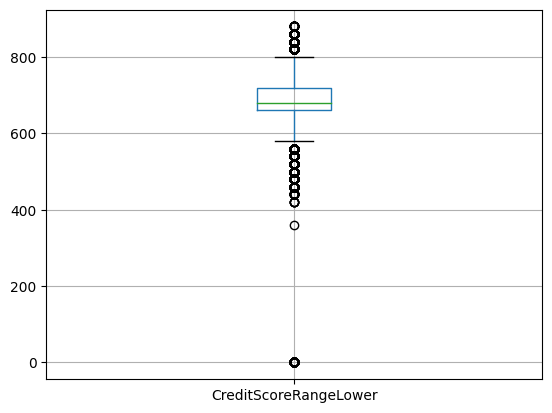

The number of the outliers for CreditScoreRangeLower in the boxplot: 7855


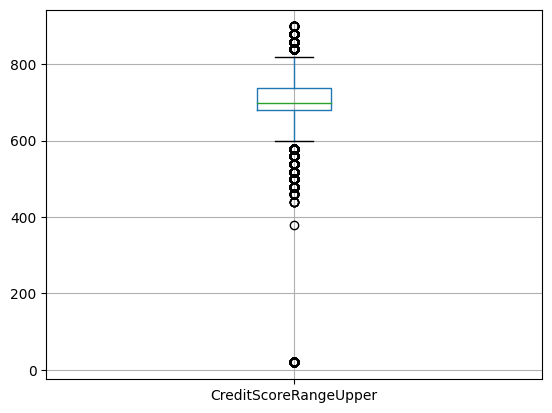

The number of the outliers for CreditScoreRangeUpper in the boxplot: 7855


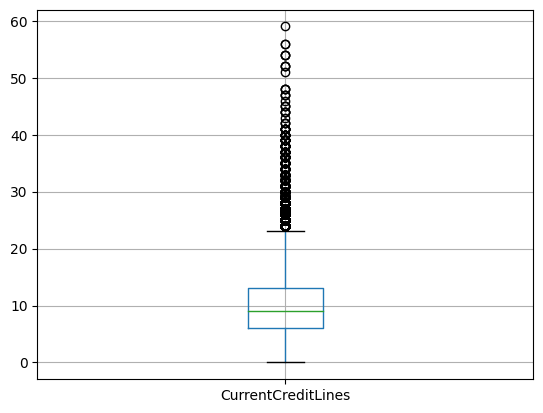

The number of the outliers for CurrentCreditLines in the boxplot: 2523


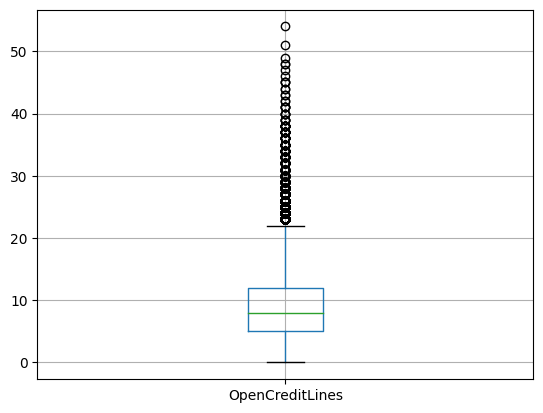

The number of the outliers for OpenCreditLines in the boxplot: 1911


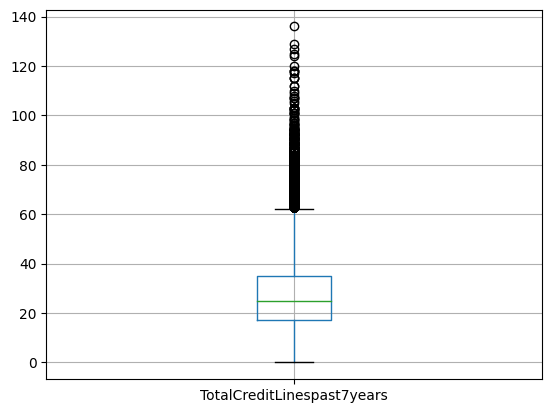

The number of the outliers for TotalCreditLinespast7years in the boxplot: 1926


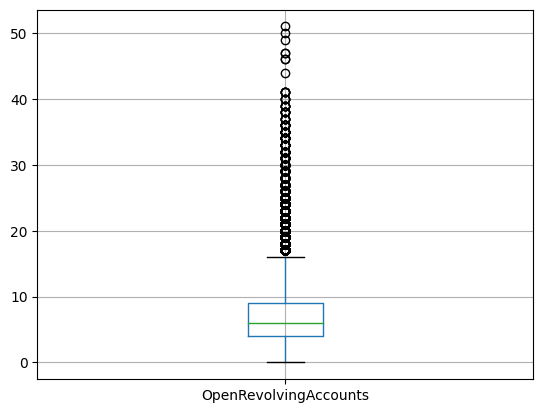

The number of the outliers for OpenRevolvingAccounts in the boxplot: 4481


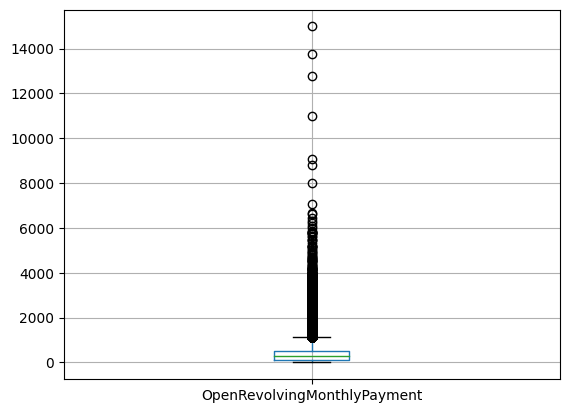

The number of the outliers for OpenRevolvingMonthlyPayment in the boxplot: 6743


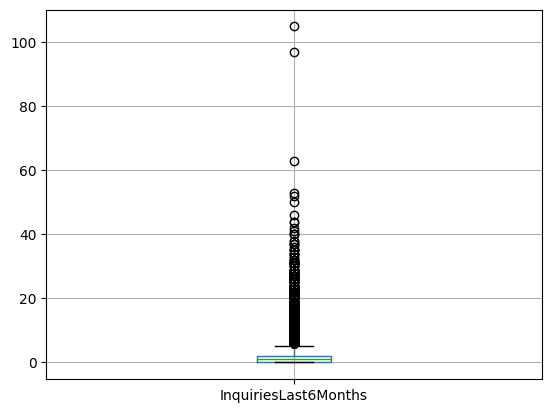

The number of the outliers for InquiriesLast6Months in the boxplot: 8188


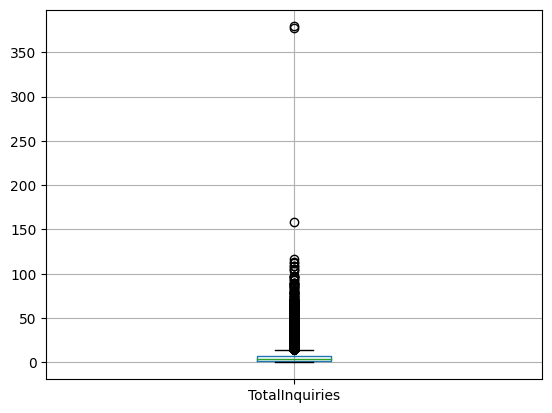

The number of the outliers for TotalInquiries in the boxplot: 7418


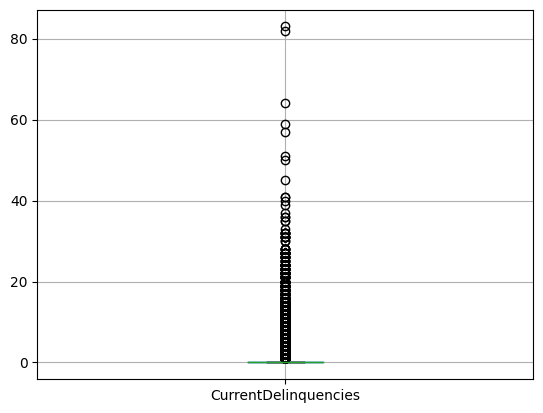

The number of the outliers for CurrentDelinquencies in the boxplot: 113912


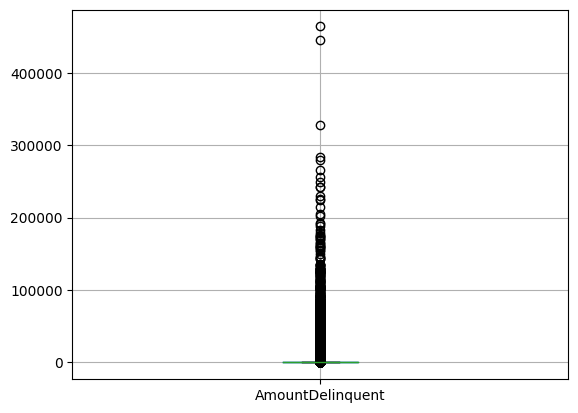

The number of the outliers for AmountDelinquent in the boxplot: 113912


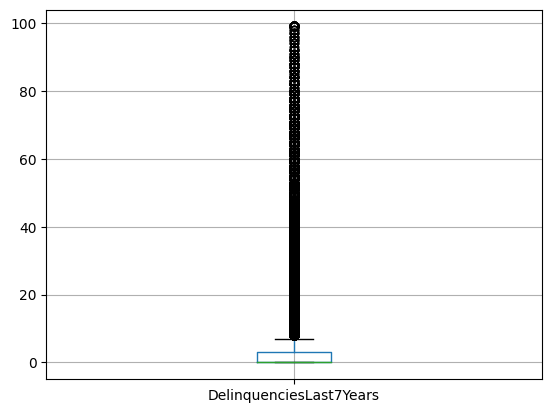

The number of the outliers for DelinquenciesLast7Years in the boxplot: 18623


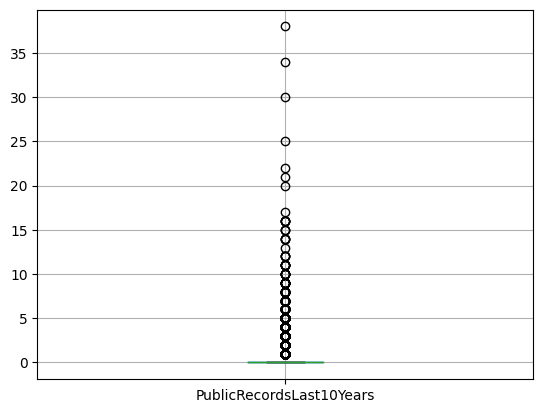

The number of the outliers for PublicRecordsLast10Years in the boxplot: 113912


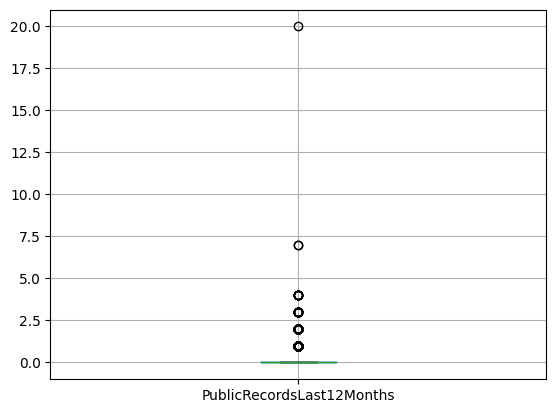

The number of the outliers for PublicRecordsLast12Months in the boxplot: 113912


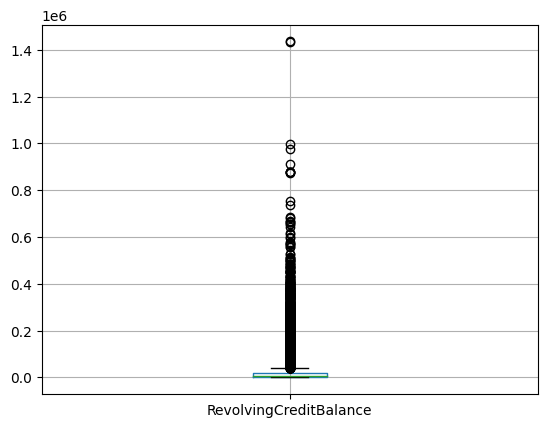

The number of the outliers for RevolvingCreditBalance in the boxplot: 9670


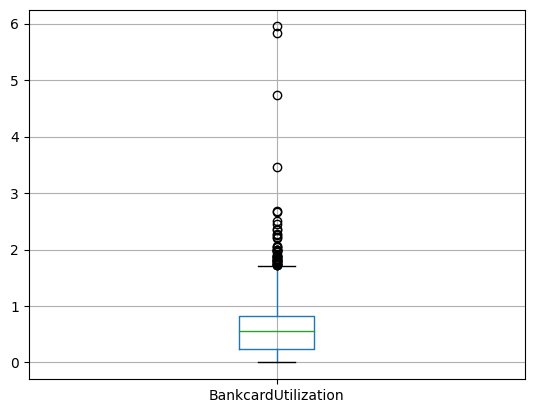

The number of the outliers for BankcardUtilization in the boxplot: 43


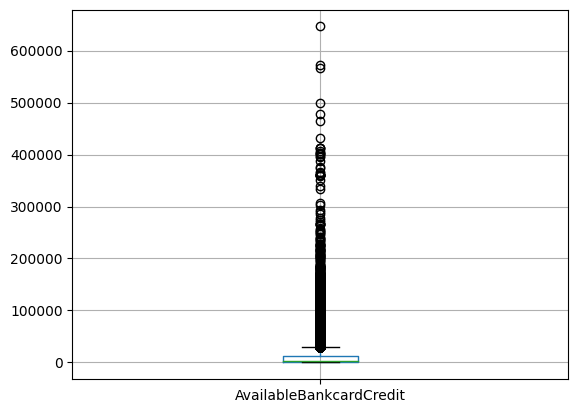

The number of the outliers for AvailableBankcardCredit in the boxplot: 10995


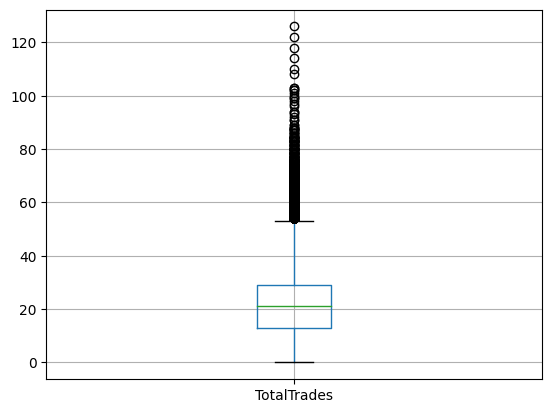

The number of the outliers for TotalTrades in the boxplot: 1960


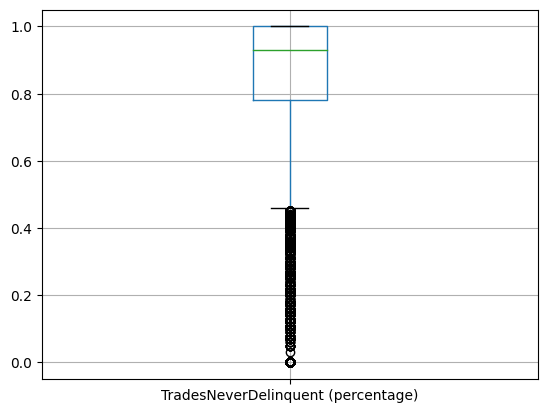

The number of the outliers for TradesNeverDelinquent (percentage) in the boxplot: 9552


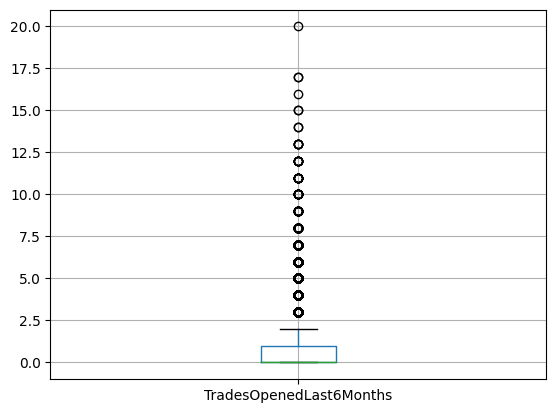

The number of the outliers for TradesOpenedLast6Months in the boxplot: 7489


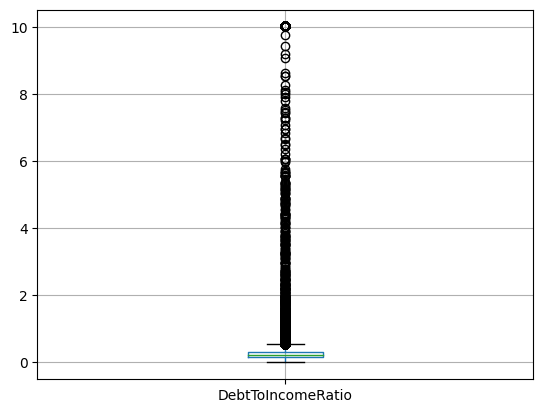

The number of the outliers for DebtToIncomeRatio in the boxplot: 3796


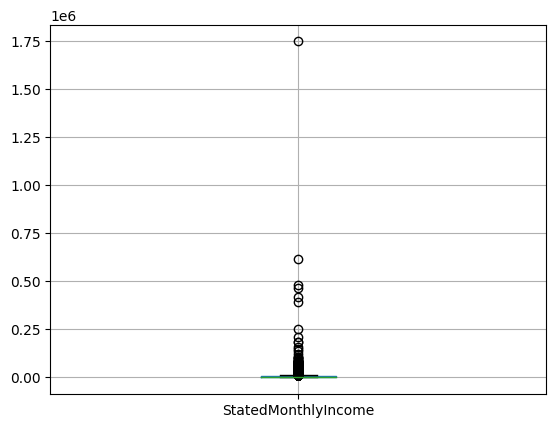

The number of the outliers for StatedMonthlyIncome in the boxplot: 5698


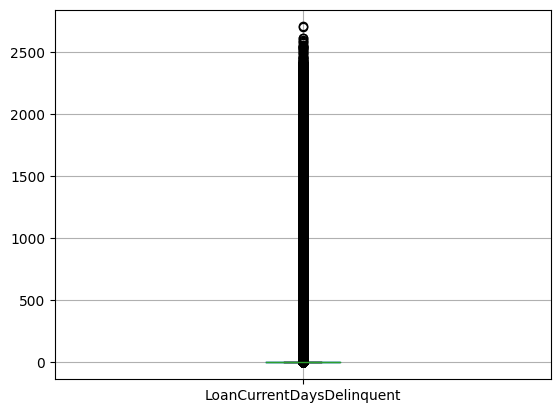

The number of the outliers for LoanCurrentDaysDelinquent in the boxplot: 113912


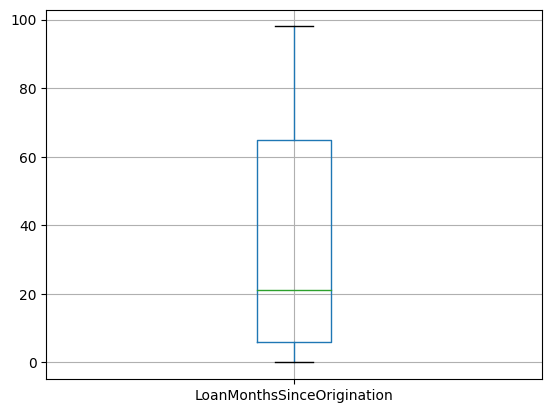

The number of the outliers for LoanMonthsSinceOrigination in the boxplot: 0


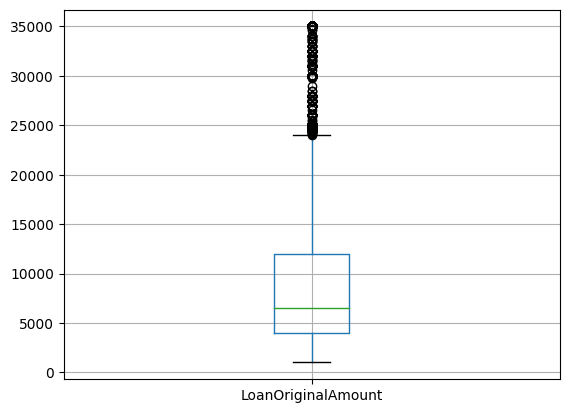

The number of the outliers for LoanOriginalAmount in the boxplot: 4559


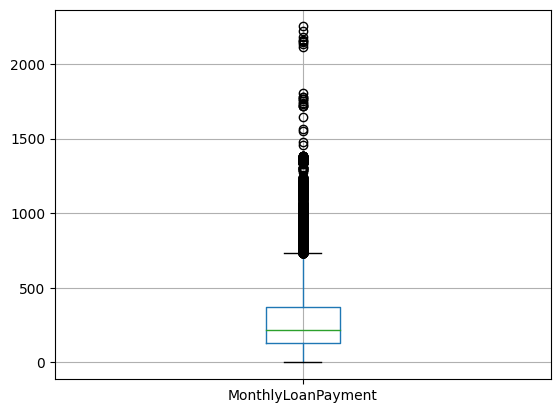

The number of the outliers for MonthlyLoanPayment in the boxplot: 3425


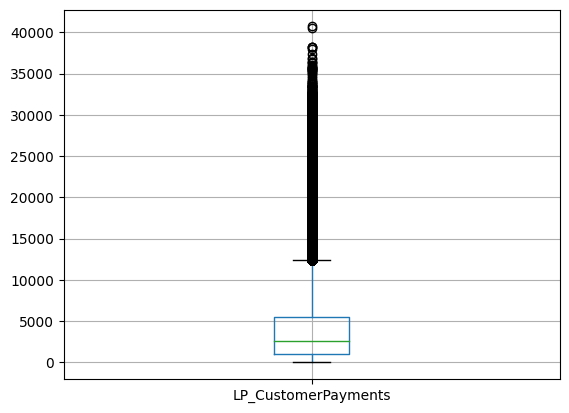

The number of the outliers for LP_CustomerPayments in the boxplot: 7363


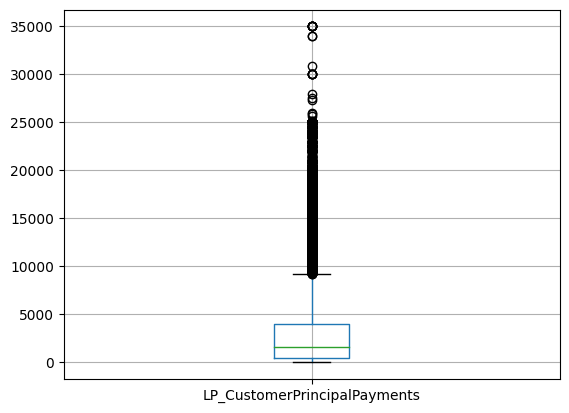

The number of the outliers for LP_CustomerPrincipalPayments in the boxplot: 9352


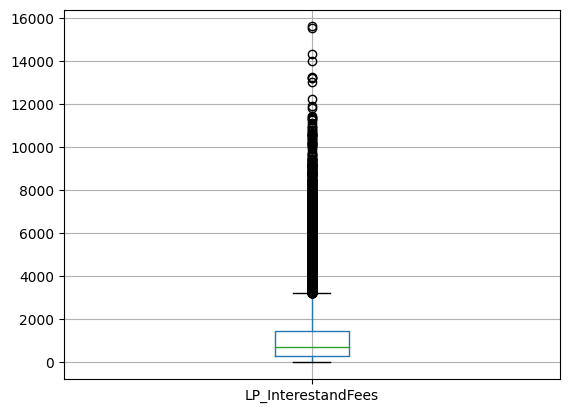

The number of the outliers for LP_InterestandFees in the boxplot: 6960


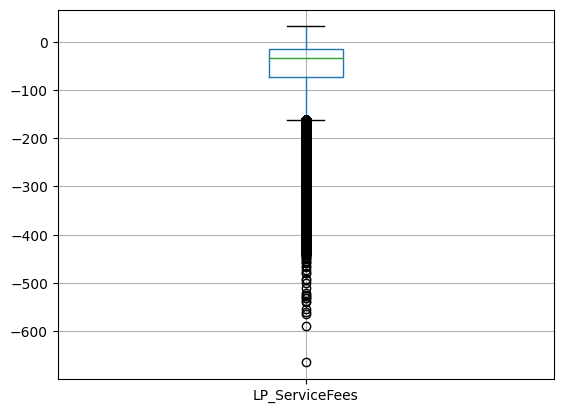

The number of the outliers for LP_ServiceFees in the boxplot: 7496


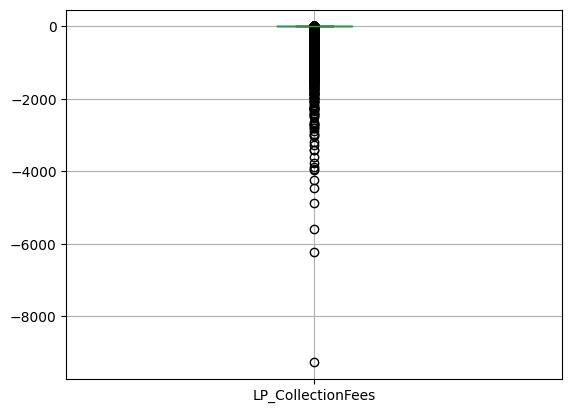

The number of the outliers for LP_CollectionFees in the boxplot: 113912


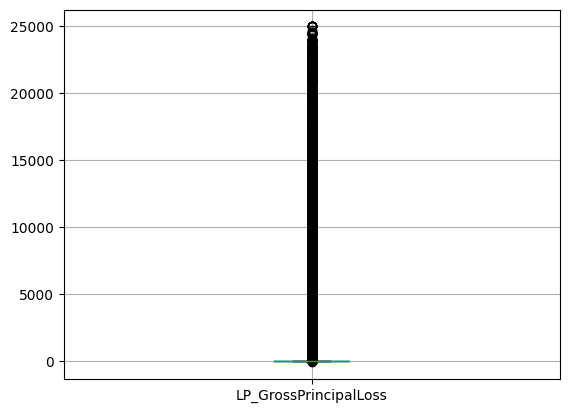

The number of the outliers for LP_GrossPrincipalLoss in the boxplot: 113912


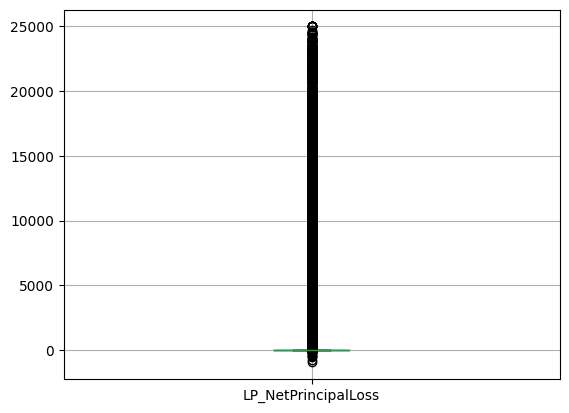

The number of the outliers for LP_NetPrincipalLoss in the boxplot: 113912


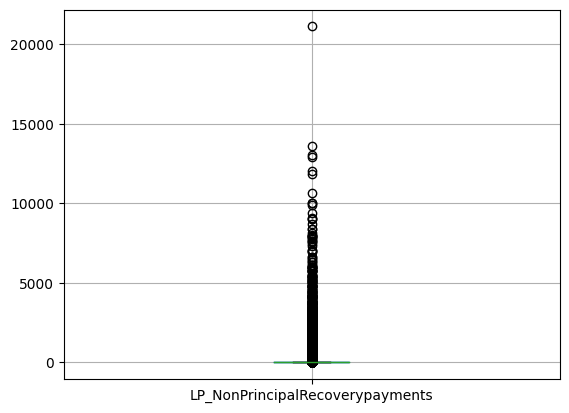

The number of the outliers for LP_NonPrincipalRecoverypayments in the boxplot: 113912


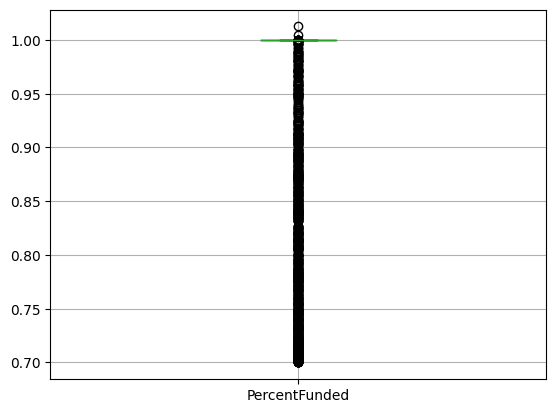

The number of the outliers for PercentFunded in the boxplot: 113912


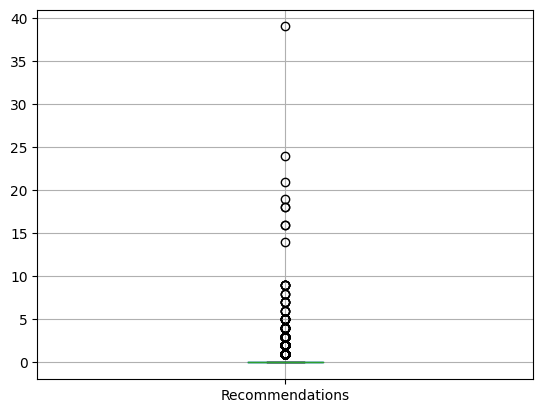

The number of the outliers for Recommendations in the boxplot: 113912


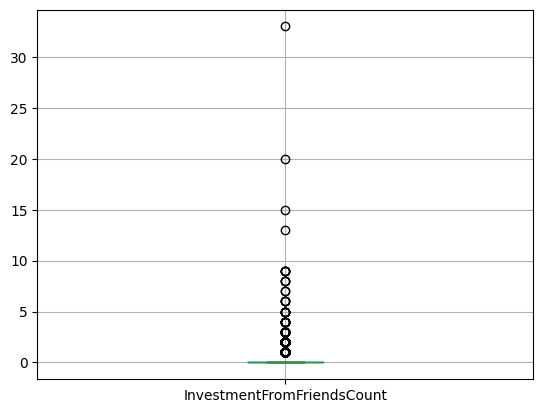

The number of the outliers for InvestmentFromFriendsCount in the boxplot: 113912


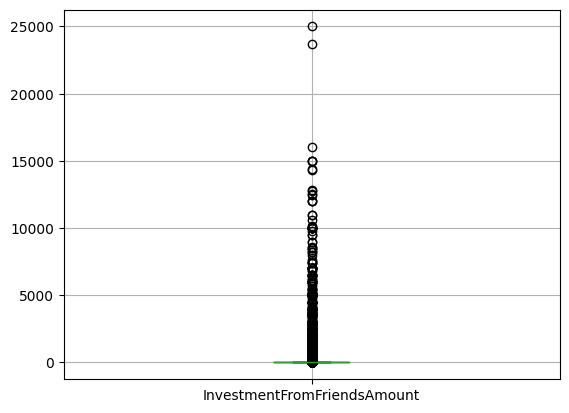

The number of the outliers for InvestmentFromFriendsAmount in the boxplot: 113912


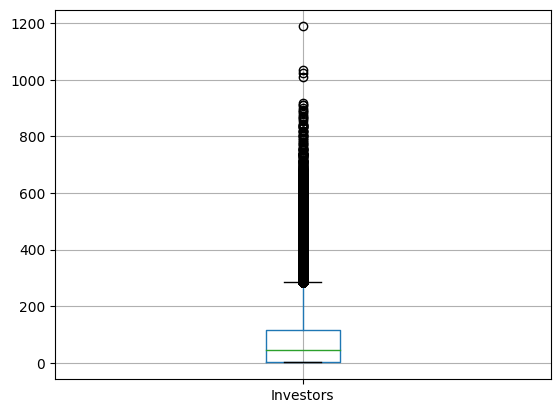

The number of the outliers for Investors in the boxplot: 6117


In [369]:
num_cols = df.select_dtypes(include=['float64','int32','int64']).columns
for x in num_cols:
    
    df.boxplot(column=[x])
    plt.show()
    lower_bound, upper_bound, outlier = outliers(df,x)
    print('The number of the outliers for ' + x +' in the boxplot: {}'.format(outlier))


In [370]:
num_cols = df.select_dtypes(include=['float64','int32','int64']).columns
for x in num_cols:
    lower_bound, upper_bound, outlier = outliers(df,x)
    if (outlier <= 13000):
        removeOutliers(df,x, upper_bound,lower_bound)


#### too many outliers i don't know how to handle them

# EDA

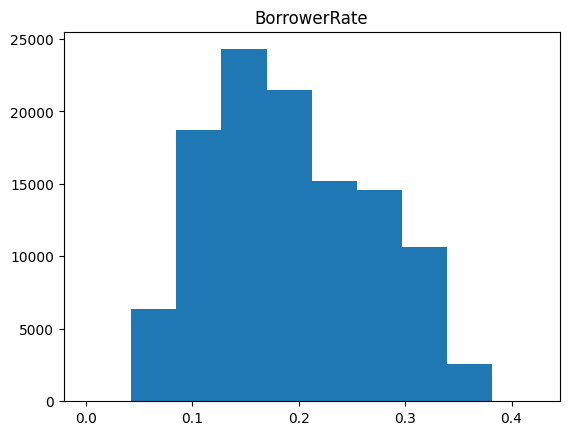

In [371]:
# What is the highest number of BorrowerRate?
# between 0.1 and 0.2
plt.hist(df['BorrowerRate'])
plt.title("BorrowerRate")
plt.show()

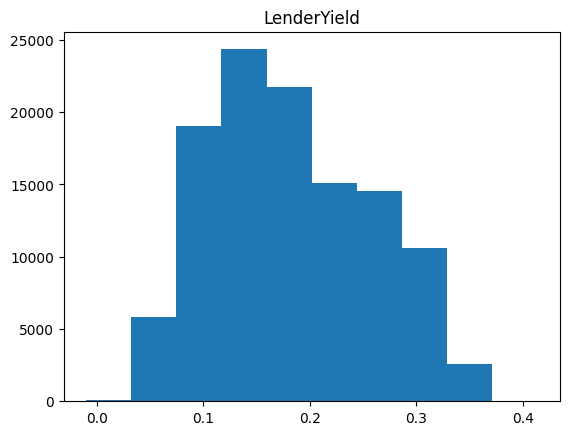

In [372]:
# Since the highest number of Borrower Rate is between 0.1 and 0.2, does the highest number of Lender Yield is between 0.1 and 0.2?
# yes
plt.hist(df['LenderYield'])
plt.title("LenderYield")
plt.show()

<AxesSubplot: xlabel='CreditGrade', ylabel='MonthlyLoanPayment'>

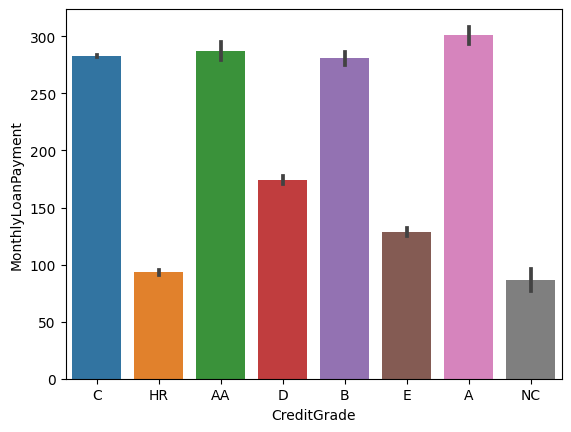

In [373]:
# Is the Credit Grade really accurate? Does higher Credit Grade leads to higher Monthly Loan Payment? As for Higher Credit Grade we mean from Grade AA to B
# checking the bivariate relationship between credit grade and MonthlyLoanPayment using barplot 
sns.barplot(x='CreditGrade', y='MonthlyLoanPayment', data=df)
# no exiplicit relationship between them

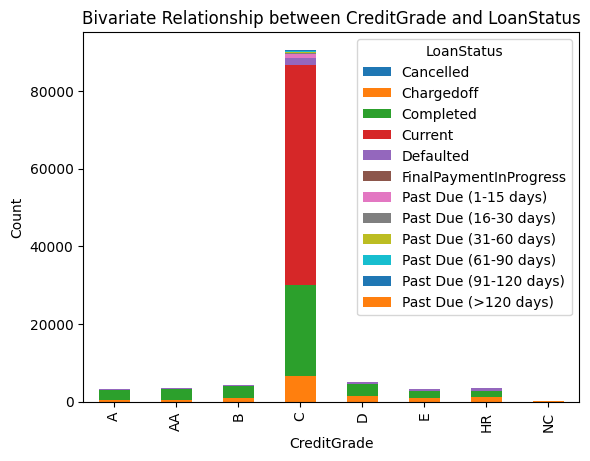

In [374]:
# Here we look at the Completed Loan Status and Defaulted Rate to determine the accuracy of Credit Grade.
crosstab = pd.crosstab(df['CreditGrade'], df['LoanStatus'])
crosstab.plot(kind='bar', stacked=True)
plt.xlabel('CreditGrade')
plt.ylabel('Count')
plt.title('Bivariate Relationship between CreditGrade and LoanStatus')
plt.show()
# the credit grade is accurate lower grades have higher defaulted loans

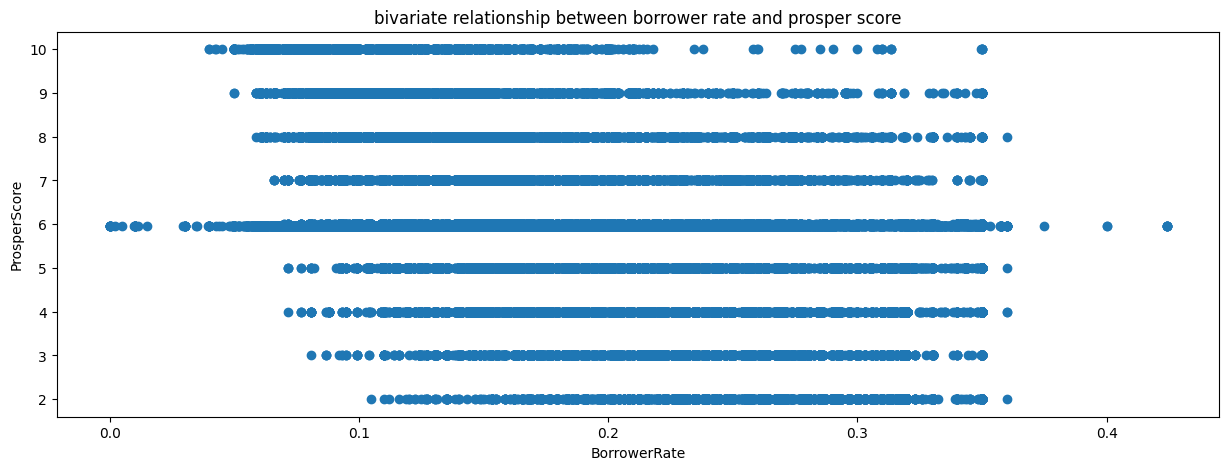

In [375]:
# Now we need to understand does the ProsperScore, the custom built risk assesment system is being used in determing borrower’s rate?
# checking the bivariate relationship between borrower rate and prosper score using scatterplot
plt.figure(figsize=(15,5))
plt.scatter(df['BorrowerRate'], df['ProsperScore'])
plt.xlabel('BorrowerRate')
plt.ylabel('ProsperScore')
plt.title('bivariate relationship between borrower rate and prosper score')
plt.show()


## Labeling the data

In [376]:
df['ClosedDate'].values

array(['2009-08-14T00:00:00.000000000',                           'NaT',
       '2009-12-17T00:00:00.000000000', ...,
                                 'NaT', '2013-08-13T00:00:00.000000000',
                                 'NaT'], dtype='datetime64[ns]')

In [377]:
df.loc[df['ClosedDate'].isnull(), 'LoanStatus'] = 'refused'
df.loc[df['LoanCurrentDaysDelinquent'] >= 180, 'LoanStatus'] = 'accepted'
df.loc[df['LoanCurrentDaysDelinquent'] < 180, 'LoanStatus'] = 'refused'
df['LoanStatus'].unique()
df = df.drop(['LoanCurrentDaysDelinquent','ClosedDate'],axis=1)
df


,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,C,36,refused,0.16516,0.1580,0.1380,0.168661,0.080306,0.096068,4.072243,...,-133.180,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258.0
1,C,36,refused,0.12016,0.0920,0.0820,0.079600,0.024900,0.054700,6.000000,...,0.000,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1.0
2,HR,36,refused,0.28269,0.2750,0.2400,0.168661,0.080306,0.096068,4.072243,...,-24.200,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41.0
3,C,36,refused,0.12528,0.0974,0.0874,0.084900,0.024900,0.060000,6.000000,...,-108.010,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158.0
4,C,36,refused,0.24614,0.2085,0.1985,0.183160,0.092500,0.090660,3.000000,...,-60.270,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,C,36,refused,0.22354,0.1864,0.1764,0.164900,0.069900,0.095000,4.000000,...,-75.580,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1.0
113933,C,36,refused,0.13220,0.1110,0.1010,0.100700,0.020000,0.080700,6.000000,...,-30.050,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22.0
113934,C,60,refused,0.23984,0.2150,0.2050,0.188280,0.102500,0.085780,3.000000,...,-16.910,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119.0
113935,C,60,refused,0.28408,0.2605,0.2505,0.244500,0.085000,0.151420,4.000000,...,-162.055,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274.0


In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 58 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   CreditGrade                         113912 non-null  object 
 1   Term                                113912 non-null  int64  
 2   LoanStatus                          113912 non-null  object 
 3   BorrowerAPR                         113912 non-null  float64
 4   BorrowerRate                        113912 non-null  float64
 5   LenderYield                         113912 non-null  float64
 6   EstimatedEffectiveYield             113912 non-null  float64
 7   EstimatedLoss                       113912 non-null  float64
 8   EstimatedReturn                     113912 non-null  float64
 9   ProsperRating (numeric)             113912 non-null  float64
 10  ProsperRating (Alpha)               113912 non-null  object 
 11  ProsperScore              

## Ranging the categorical variables

In [379]:
df['CreditGrade'].unique()

array(['C', 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

In [380]:
creditGrade_map = {
    'AA':1,
    'A':2,
    'B':3,
    'C':4,
    'D':5,
    'E':6,
    'HR':7,
    'NC':8
}

df['CreditGrade'] = df['CreditGrade'].map(creditGrade_map)
df['CreditGrade'].unique()

array([4, 7, 1, 5, 3, 6, 2, 8], dtype=int64)

In [381]:
df['ProsperRating (Alpha)'].unique()

array(['C', 'A', 'D', 'B', 'E', 'AA', 'HR'], dtype=object)

In [382]:
properRating_alpha_map = {
    'AA':1,
    'A':2,
    'B':3,
    'C':4,
    'D':5,
    'E':6,
    'HR':7
    
}

df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].map(properRating_alpha_map)

In [383]:
df['ProsperRating (Alpha)'].unique()

array([4, 2, 5, 3, 6, 1, 7], dtype=int64)

## Data Encoding

In [384]:
# the target variable
df['LoanStatus']=df['LoanStatus'].replace('accepted',1)
df['LoanStatus']=df['LoanStatus'].replace('refused',0)
df['LoanStatus'].unique()

array([0, 1], dtype=int64)

In [385]:
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()

In [386]:
for x in df:
    print(x,":",df[x].unique())

CreditGrade : [4 7 1 5 3 6 2 8]
Term : [36 60 12]
LoanStatus : [0 1]
BorrowerAPR : [0.16516 0.12016 0.28269 ... 0.22674 0.3477  0.19543]
BorrowerRate : [0.158  0.092  0.275  ... 0.2037 0.2309 0.0739]
LenderYield : [0.138  0.082  0.24   ... 0.0494 0.2209 0.0579]
EstimatedEffectiveYield : [0.16866147 0.0796     0.0849     ... 0.1267     0.1501     0.1847    ]
EstimatedLoss : [0.08030586 0.0249     0.0925     0.0449     0.1275     0.0799
 0.0099     0.089      0.0524     0.0274     0.0224     0.1614
 0.1225     0.1025     0.1575     0.1075     0.0649     0.021
 0.0624     0.0399     0.038      0.0424     0.013      0.0899
 0.0595     0.1475     0.1175     0.0149     0.0724     0.0565
 0.0699     0.0299     0.0474     0.0324     0.0774     0.119
 0.1325     0.0674     0.13       0.0349     0.0824     0.112
 0.0975     0.147      0.1375     0.0495     0.0124     0.1425
 0.0849     0.149      0.142      0.0599     0.0749     0.0199
 0.099      0.052      0.065      0.0574     0.1125     0.00

In [387]:
coltoencode = ['CreditGrade','LoanStatus','ProsperRating (Alpha)','Occupation','EmploymentStatus','CurrentlyInGroup','IncomeVerifiable','IsBorrowerHomeowner']
for x in coltoencode:
    df[x]=lb.fit_transform(df[x])
df.info()    


<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 58 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   CreditGrade                         113912 non-null  int64  
 1   Term                                113912 non-null  int64  
 2   LoanStatus                          113912 non-null  int64  
 3   BorrowerAPR                         113912 non-null  float64
 4   BorrowerRate                        113912 non-null  float64
 5   LenderYield                         113912 non-null  float64
 6   EstimatedEffectiveYield             113912 non-null  float64
 7   EstimatedLoss                       113912 non-null  float64
 8   EstimatedReturn                     113912 non-null  float64
 9   ProsperRating (numeric)             113912 non-null  float64
 10  ProsperRating (Alpha)               113912 non-null  int64  
 11  ProsperScore              

In [388]:
df['IncomeRange'].unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

In [389]:
df['IncomeRange']=df['IncomeRange'].replace('Not displayed','$0')
df['IncomeRange']=df['IncomeRange'].replace('Not employed','$0')

df['IncomeRange'].unique()

array(['$25,000-49,999', '$50,000-74,999', '$0', '$100,000+',
       '$75,000-99,999', '$1-24,999'], dtype=object)

In [390]:
df['IncomeRange'] = df['IncomeRange'].str.replace('$', '') 
df['IncomeRange'] = df['IncomeRange'].str.replace(',', '')
df['IncomeRange'] = df['IncomeRange'].str.replace('+', '')
df['IncomeRange'].unique()

C:\Users\mahamedhat\AppData\Local\Temp\ipykernel_29300\2530401246.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['IncomeRange'] = df['IncomeRange'].str.replace('$', '')
C:\Users\mahamedhat\AppData\Local\Temp\ipykernel_29300\2530401246.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['IncomeRange'] = df['IncomeRange'].str.replace('+', '')


array(['25000-49999', '50000-74999', '0', '100000', '75000-99999',
       '1-24999'], dtype=object)

In [391]:
int_arr=[]
for val in df['IncomeRange']:
    if '-' in val:
        lower, upper = val.split('-')
        int_val = (int(lower) + int(upper)) // 2
    else:
        int_val = int(val)
    int_arr.append(int_val)
df['IncomeAverage']=int_arr
df=df.drop('IncomeRange', axis=1)
df['IncomeAverage'].unique()

array([ 37499,  62499,      0, 100000,  87499,  12500], dtype=int64)

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 58 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   CreditGrade                         113912 non-null  int64  
 1   Term                                113912 non-null  int64  
 2   LoanStatus                          113912 non-null  int64  
 3   BorrowerAPR                         113912 non-null  float64
 4   BorrowerRate                        113912 non-null  float64
 5   LenderYield                         113912 non-null  float64
 6   EstimatedEffectiveYield             113912 non-null  float64
 7   EstimatedLoss                       113912 non-null  float64
 8   EstimatedReturn                     113912 non-null  float64
 9   ProsperRating (numeric)             113912 non-null  float64
 10  ProsperRating (Alpha)               113912 non-null  int64  
 11  ProsperScore              

In [393]:
df

,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,IncomeAverage
0,3,36,0,0.16516,0.1580,0.1380,0.168661,0.080306,0.096068,4.072243,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258.0,37499
1,3,36,0,0.12016,0.0920,0.0820,0.079600,0.024900,0.054700,6.000000,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1.0,62499
2,6,36,0,0.28269,0.2750,0.2400,0.168661,0.080306,0.096068,4.072243,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41.0,0
3,3,36,0,0.12528,0.0974,0.0874,0.084900,0.024900,0.060000,6.000000,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158.0,37499
4,3,36,0,0.24614,0.2085,0.1985,0.183160,0.092500,0.090660,3.000000,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20.0,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,3,36,0,0.22354,0.1864,0.1764,0.164900,0.069900,0.095000,4.000000,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1.0,62499
113933,3,36,0,0.13220,0.1110,0.1010,0.100700,0.020000,0.080700,6.000000,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22.0,87499
113934,3,60,0,0.23984,0.2150,0.2050,0.188280,0.102500,0.085780,3.000000,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119.0,37499
113935,3,60,0,0.28408,0.2605,0.2505,0.244500,0.085000,0.151420,4.000000,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274.0,37499


In [394]:


df = df.drop(['CurrentDelinquencies','AmountDelinquent','PublicRecordsLast10Years','PublicRecordsLast12Months','LP_NonPrincipalRecoverypayments','LP_CollectionFees'
    ,'InvestmentFromFriendsCount','InvestmentFromFriendsAmount'],axis=1)


In [395]:
df.to_csv('processedData.csv')

In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 50 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   CreditGrade                         113912 non-null  int64  
 1   Term                                113912 non-null  int64  
 2   LoanStatus                          113912 non-null  int64  
 3   BorrowerAPR                         113912 non-null  float64
 4   BorrowerRate                        113912 non-null  float64
 5   LenderYield                         113912 non-null  float64
 6   EstimatedEffectiveYield             113912 non-null  float64
 7   EstimatedLoss                       113912 non-null  float64
 8   EstimatedReturn                     113912 non-null  float64
 9   ProsperRating (numeric)             113912 non-null  float64
 10  ProsperRating (Alpha)               113912 non-null  int64  
 11  ProsperScore              